## Journal Club - What can we do with Python?


-    Data Visualization
-    Data Analysis
-    Image Processing
-    Python for Education

## 0 - General

- how to install Python? you need an interface like vs code  
- use github for version control  
- manage projects and packages with virtual environments  

## 1 - Data Visualization

![data_vis](data_vis.jpg)

**A - Simple Example**

First - Install and load package

In [23]:
# !pip install matplotlib
# !pip install numpy
import matplotlib.pyplot as plt  ## package for plotting image
import numpy as np               ## package for array and matrix

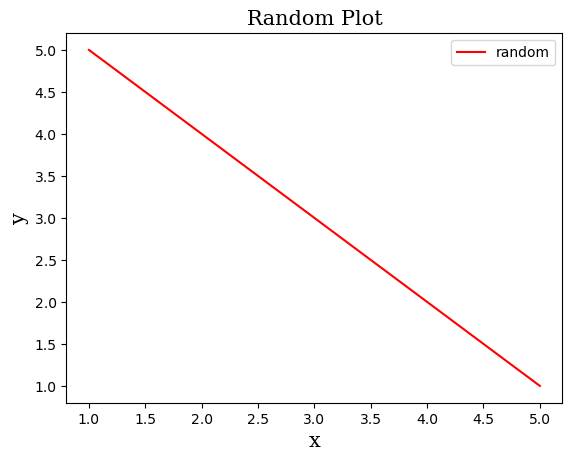

In [24]:
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]

plt.plot(x, y, color = 'r', label = 'random')
plt.title('Random Plot', fontsize = 15, family = 'serif')
plt.xlabel('x', fontsize = 15, family = 'serif')
plt.ylabel('y', fontsize = 15, family = 'serif')
plt.legend()
plt.show()

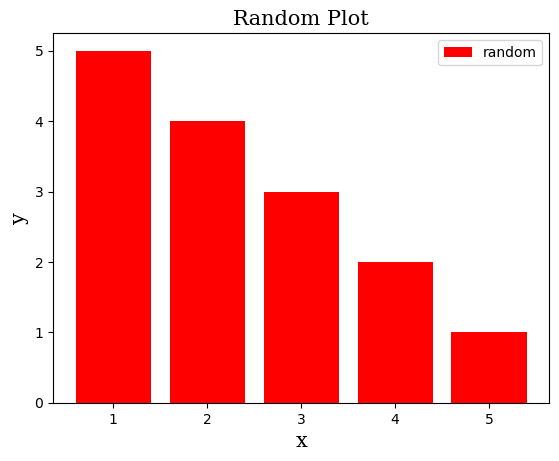

In [25]:
plt.bar(x, y, color = 'r', label = 'random')
plt.title('Random Plot', fontsize = 15, family = 'serif')
plt.xlabel('x', fontsize = 15, family = 'serif')
plt.ylabel('y', fontsize = 15, family = 'serif')
plt.legend()
plt.show()

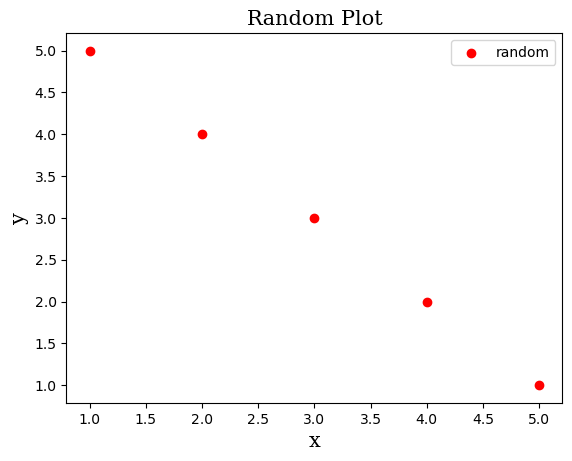

In [26]:
plt.scatter(x, y, color = 'r', label = 'random')
plt.title('Random Plot', fontsize = 15, family = 'serif')
plt.xlabel('x', fontsize = 15, family = 'serif')
plt.ylabel('y', fontsize = 15, family = 'serif')
plt.legend()
plt.show()

**B - Scientific Plot**

Install and load the package

In [27]:
!pip install SciencePlots

In [28]:
plt.style.use(['science','no-latex'])
def model(x, p):
    y = x ** (2 * p + 1) / (1 + x ** (2 * p))
    return y

x = np.linspace(0.75, 1.25, 201)

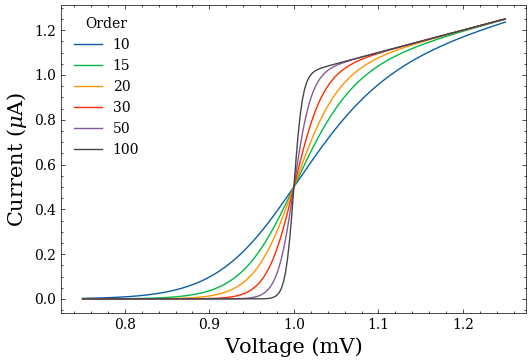

In [29]:
plt.figure(figsize=(6,4))                       ##change the figuresize

for p in [10, 15, 20, 30, 50, 100]:
        plt.plot(x, model(x, p), label=p)

plt.xlabel('Voltage (mV)', fontsize = 15)   
plt.ylabel('Current ($\mu$A)', fontsize = 15)
plt.legend(title='Order')
plt.savefig('./figure.png')
plt.show()

**All the example plots: https://matplotlib.org/stable/gallery/index.html**

## 2 - Data Analysis

![data_ana](data_ana.png)

### Linear Regression

Here is just a short example of how to do linear regression with least squares.

In [30]:
from scipy.stats import linregress

x = np.array([1,2,3,4,5,6,7])

y = x + np.random.rand(7) 
reg = linregress(x,y)

fitted_y = reg.intercept + reg.slope*x

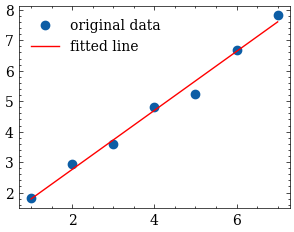

In [31]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, fitted_y,'r', label='fitted line')
plt.legend()
plt.show()

**Python for Data Analysis**

In [32]:
# !pip install pandas
import pandas as pd

In [33]:
data = pd.read_csv('train.csv')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [35]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [36]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [37]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Explore the data**

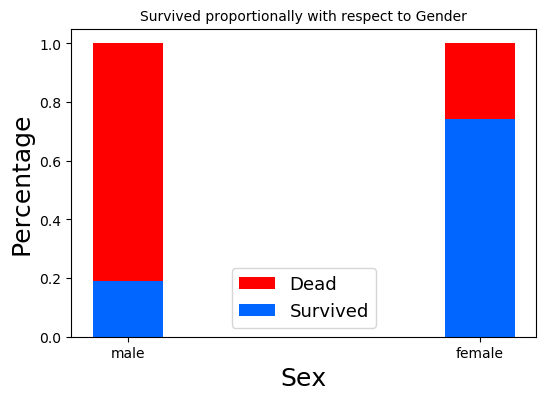

In [38]:
plt.rcdefaults() 
plt.figure(figsize=(6,4))


male = data.Survived[data.Sex == 'male'].value_counts(normalize=True).sort_index()
female = data.Survived[data.Sex == 'female'].value_counts(normalize=True).sort_index()

plt.bar(['male','female'],[1,1],width=0.2,color="#ff0000",label='Dead')
plt.bar(['male','female'],[male[1],female[1]],width=0.2,color="#0066ff",label='Survived')
plt.title("Survived proportionally with respect to Gender",size=10)
plt.legend(fontsize=13,loc='best') 
plt.ylabel('Percentage',size=18)
plt.xlabel('Sex',size=18)
plt.show()

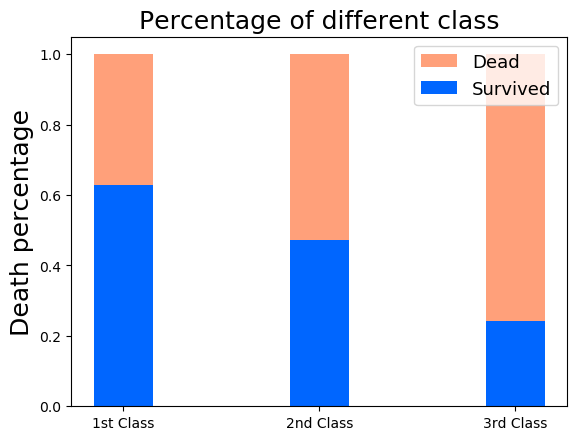

In [39]:
df_3 = data.Survived[data.Pclass == 3].value_counts(normalize=True)[1]
df_2 = data.Survived[data.Pclass == 2].value_counts(normalize=True)[1]
df_1 = data.Survived[data.Pclass == 1].value_counts(normalize=True)[1]


plt.bar(['1st Class', '2nd Class','3rd Class'],[1,1,1],width=0.3,color='#FFA07A',label='Dead')
plt.bar(['1st Class', '2nd Class','3rd Class'],[df_1,df_2,df_3],width=0.3,color='#0066ff',label='Survived')
plt.title('Percentage of different class',size=18)
plt.ylabel('Death percentage',size=18)
plt.legend(fontsize=13)
plt.show()

**Feature Engineering**

- Missing Values

In [40]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
data.loc[data.Age.isnull()] = data.Age.describe()['mean']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    float64
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     362 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(6), object(5)
memory usage: 76.7+ KB


https://github.com/QingheGao/DM/blob/master/project1/Group_126_data_mining.ipynb

- Feature Combination

In [42]:
data['Fam']= data['SibSp'] + data['Parch']+1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    float64
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     362 non-null    object 
 10  Embarked  889 non-null    object 
 11  Fam       891 non-null    float64
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


**Fitting Machine Learning Model**

-
https://github.com/QingheGao/DM/blob/master/project1/Group_126_data_mining.ipynb

## 3 - Image Processing

![image_pro](image_pro.png)

Python offers many tools for image processing. Most of them are available through the **open CV** (open computer vision) package

**A. Install Package**

In [43]:
!pip install opencv-python

     |████████████████████████████████| 60.3 MB 2.9 MB/s eta 0:00:01


**B. Import Package**

In [44]:
import cv2

**C. Do nice stuff with package**

***Filter***

Filter are a useful thing for preprocessing of images. A popular example is the **Median filter** which is especially useful to remove salt and/or pepper noise (white respectively black pixels in greyscale images).

Our example for the following methods:

![brain](salt_pepper_noise.png)

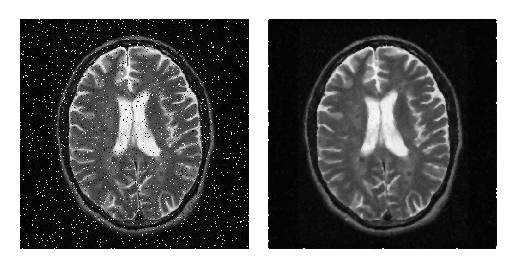

In [45]:
img = cv2.imread('salt_pepper_noise.png')
median = cv2.medianBlur(img, 5)
compare = np.concatenate((img, median), axis=1) #side by side comparison

plt.imshow(compare)
plt.axis('off')
plt.show()

***Edge Detection***

Edge detection is a nice tool to visualize the shape of objects. Here, we use the same edge detection algorithm as shown before by Christian & Kaiqiao, namely the **Canny Edge Detection** algorithm. (We filter the images first to remove s&p noise)

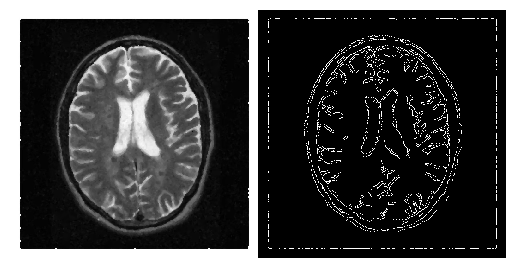

In [46]:
img = cv2.imread('salt_pepper_noise.png',0)
median = cv2.medianBlur(img, 5)
edges = cv2.Canny(median,100,200)
compare = np.concatenate((median, edges), axis=1) #side by side comparison

plt.imshow(compare, cmap='gray')
plt.axis('off')
plt.show()

## 4 - Python for Teaching

![teaching](teaching.jpg)

All we did so far was teaching content to you. You may have realized that Python can be quite useful for teaching.

> * Math-related Courses
>   1. Visualize Theorems or Correlations.
>   2. Make teaching interactive.
> * Programming-related Courses
>   1. Provide a Code Base studends can work on.
>   2. Organize Assignments.

We think, Python can really help you to create a better learning experience for STEM courses.

Here, we show an example how we can use Python and more specifically JupyterLab, to visualize a phenomena and make it interactive for the students. The well-known fully developed, laminar flow through a straight, circular pipe.

![flow](flow.png)  
$u\left( r \right) = \frac{{ - {R^2}}}{{4\mu }}\left( {\frac{{dp}}{{dx}}} \right)\left( {1 - \frac{{{r^2}}}{{{R^2}}}} \right)$


Same procedure as before...

**A. Install package**

In [47]:
!pip install ipywidgets

**B. Import package**

In [48]:
from ipywidgets import interact

**C. Do stuff with package**

Here, we want to get input from the user for tuning the parameter in order to give the user a feeling of the theorem.

First, we define the velocity profile function.

In [49]:
def get_velocity_profile(mu, R, dpdx, r):
    u = np.zeros(len(r))
    for i in range(len(r)):
        u[i] = R**2/4/mu*dpdx*(1-(r[i]/R)**2)
    return u

Then we use the velocity profile function to plot 

In [ ]:
mu_min = 1 # minimum dynamic viscosity [kg/m/s]
mu_max = 10 # maximum dynamic viscosity [kg/m/s]

@interact
def show_velocity_profile(viscosity=(mu_min, mu_max)):
    R = 0.1 # radius [m]
    dpdx = 1e5 # axial pressure drop [N/m3]
    r = np.linspace(0, R, 10) # radial position [m]
    v = get_velocity_profile(viscosity, R, dpdx, r)
    plt.plot(v, r, 'b')
    plt.plot(v, -r, 'b')
    plt.xlim(0, max(get_velocity_profile(mu_min, R, dpdx, r)))
    plt.show()

interactive(children=(IntSlider(value=5, description='viscosity', max=10, min=1), Output()), _dom_classes=('wi…

## GitHub repository

We set up a group repository, that way we can share useful scripts. [find it here](https://github.com/LukasSchBal/PPE_scripts)
The name is "PPE_scripts", it is public and you can find it on GitHub.

In order to use it ...
- create a [GitHub account](https://github.com/) and follow the repository, clone code, etc.
- if you don't have a GitHub account (poor boy) send us files you want to contribute and copy code from the GitHub website

## Q&A Session

*Let's have a discussion!*  
Do you want to know about more possibilities or have other questions?

# Thank you for your attention!

The content of this course was brought to you by

![logo](ChemEngAi_logo.png)

If you have further questions, shoot us an email ([Qinghe Gao](mailto:Q.Gao-1@tudelft.nl) or [Lukas Schulze Balhorn](mailto:l.schulzebalhorn@tudelft.nl)) or swing by our office. It is a nice office. We have nice plants. So it's reaaally worth it to swing by!